<a href="https://colab.research.google.com/github/krucx/SHALA2020/blob/master/ML_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [2]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc.to_numpy()
y = df.Target.to_numpy()

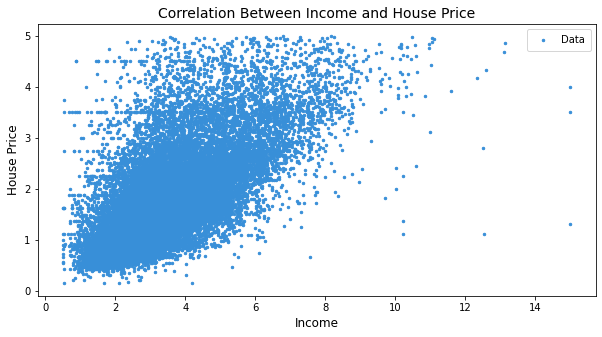

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
    m=0
    b=0
    mse = []
    for epoch in range(epochs):
        for i in range(0,X.shape[0],batch_size):
            grad1=0
            grad0=0
            for k in range(batch_size):
                grad1 = grad1 + (m*X[i+k] + b - y[i+k])*X[i]
                grad0 = grad0 + (m*X[i+k] + b - y[i+k])
            m = m - lr*grad1/X.shape[0]
            b = b - lr*grad0/X.shape[0]
        mse.append((1/(2*X.shape[0]))*((m*X + b - y)*(m*X + b - y)).sum())
    return m, b, mse

In [0]:
m, b,  mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

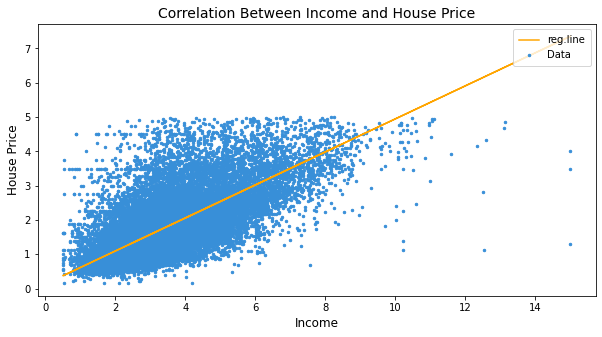

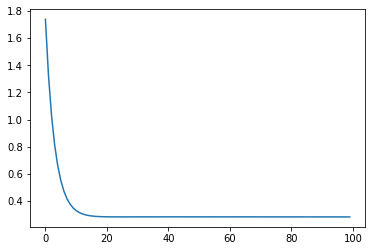

In [14]:
y_pred = m*X + b

plt.figure(figsize=(10,5))
plt.plot(X,y_pred,color='orange',label='reg.line')
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()
plt.plot(np.arange(0,100,1),mse)

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



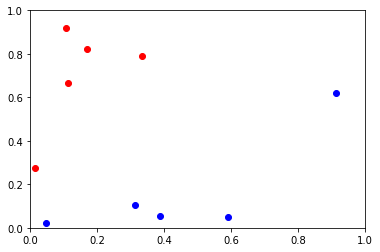

In [22]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(x, y, epoch, l_rate):
    w = np.zeros(x.shape[1])
    for t in range(1,epoch):
        e = 1/(l_rate*epoch)
        for i in range(x.shape[0]):
            if(y[i]*np.dot(x[i],w)<1):
                w = (1 - l_rate*e)*w + e*y[i]*np.transpose(x[i])
            else:
                w = (1 - l_rate*e)*w
    return w



---


**Run SVM Classifier**


---



In [24]:
data = np.asarray(data)
X_temp = data[:,:2]
Y = data[:,2] 
X = np.ones((X_temp.shape[0],X_temp.shape[1]+1))
X[:,:-1] = X_temp
w = svm_function(X, Y, 10000, 0.01)
print(w)

[-2.59679082  3.00967604 -0.49493675]


# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



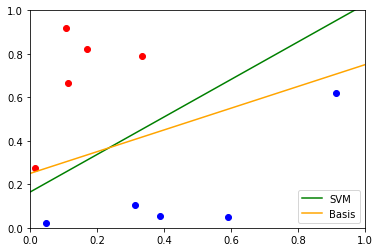

In [25]:
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
x1 = np.linspace(-5,5,100)
y1 = (-w[0]*x1-w[2])/w[1]
plt.plot(x1, y1, c='green',label='SVM')
y = 0.5*x1 + 0.25
plt.plot(x1, y, c='orange',label='Basis')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()